<a href="https://colab.research.google.com/github/Starignus/testing_langkit/blob/main/02_Trying_LangKit_Intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Investigating LangKit

[LangKit is an open-source](https://github.com/whylabs/langkit/tree/main) text metrics toolkit for monitoring language models. It offers an array of methods for extracting relevant signals from the input and/or output text, which are compatible with the open-source data logging library [whylogs](https://whylogs.readthedocs.io/en/latest/).

[LangKit can monitor and safeguard](https://whylabs.ai/blog/posts/langkit-making-large-language-models-safe-and-responsible) your LLMs by quickly detecting and preventing malicious prompts, toxicity, hallucinations, and jailbreak attempts. You can check the [metrics that covers](https://github.com/whylabs/langkit/blob/main/langkit/docs/modules.md).

First let's install the required libraries.

In [ ]:
!pip install transformers[torch]

In [ ]:
!pip install langkit[all]

In [ ]:
!pip install huggingface-hub==0.20.2

In [ ]:
!pip install bigframes==0.18.0

In [ ]:
!pip install torch

In [ ]:
! pip install datasets==2.16.1

# Intro to [Langkit](https://github.com/whylabs/langkit/blob/main/langkit/examples/Intro_to_Langkit.ipynb)

# Initialise metrics

LangKit provides a toolkit of metrics for LLM applications, lets initialize them

In [ ]:
# Path where the models from huggingface are downloaded before importing
!ls ~/.cache/

huggingface  matplotlib  node-gyp  pip


In [ ]:
from langkit import llm_metrics # alternatively use 'light_metrics'

In [ ]:
# Path where the models from huggingface are downloaded
!ls ~/.cache/huggingface/hub/

models--martin-ha--toxic-comment-model		 version.txt
models--sentence-transformers--all-MiniLM-L6-v2


In [ ]:
#  Path where the nltk data is downloaded
!ls /root/nltk_data/sentiment

vader_lexicon.zip


# Metric List  

When he module is import the next [metrics are avialable](https://docs.whylabs.ai/docs/langkit-modules/):

| MODULE  |  DESCRIPTION | TARGET  |  NOTES |
|:-:|:-:|:-:|:-:|
| [Injections](https://docs.whylabs.ai/docs/langkit-modules/#injections) | Prompt injection classification scores  | Prompt |   |
| * [Input/Output](https://docs.whylabs.ai/docs/langkit-modules/#inputoutput) | Semantic similarity between prompt and response | Prompt and Response  |  	Default llm metric |
| * [Regexes](https://docs.whylabs.ai/docs/langkit-modules/#regexes)  | Regex pattern matching for sensitive information |  Any string column |  Default llm metric, light-weight |
|  * [Sentiment](https://docs.whylabs.ai/docs/langkit-modules/#sentiment) | Sentiment Analysis | Any string column  | Default llm metric |
| * [Text Statistics](https://docs.whylabs.ai/docs/langkit-modules/#text-statistics) | Text quality, readability, complexity, and grade level  |  Any string column | Default llm metric, light-weight  |
| * [Themes](https://docs.whylabs.ai/docs/langkit-modules/#themes)  |  Semantic similarity between set of known jailbreak and LLM refusal examples | Any string column  | Default llm metric |
| [Topics](https://docs.whylabs.ai/docs/langkit-modules/#topics) | Text classification into predefined or user defined topics | Any string column | |
| * [Toxicity](https://docs.whylabs.ai/docs/langkit-modules/#toxicity) | Toxicity, harmfulness and offensiveness | Any string column | Default llm metric |

In this table we have the actual link to a page with some documetnation. The metrics that are initalised when importing the [module](https://github.com/whylabs/langkit/blob/main/langkit/llm_metrics.py) ```llm_metrics``` are marked with an *.

[Updated Metrics List](https://github.com/whylabs/langkit/blob/main/langkit/docs/modules.md)

|                      **Metric Namespace**                       |                                                      **Metrics**                                                      |                             **Description**                              |                **Target**                |                              **Notes**                               |     |
| :-------------------------------------------------------------: | :-------------------------------------------------------------------------------------------------------------------: | :----------------------------------------------------------------------: | :--------------------------------------: | :------------------------------------------------------------------: | :-: |
|                 [Hallucination](https://github.com/whylabs/langkit/blob/main/langkit/docs/modules.md#hallucination)                 |                                                response.hallucination                                                 |       Consistency between response and additional response samples       |           Prompt and Response            |                    Requires Additional LLM Calls                     |     |
|                    [Injections](https://github.com/whylabs/langkit/blob/main/langkit/docs/modules.md#injections)                    |                                                       injection                                                       |  Semantic Similarity from known prompt injections and harmful behaviors  |                  Prompt                  |                                                                      |     |
|                  [Input/Output](https://github.com/whylabs/langkit/blob/main/langkit/docs/modules.md#inputoutput)                   |                                             response.relevance_to_prompt                                              |             Semantic similarity between prompt and response              |           Prompt and Response            |               Default llm metric, Customizable Encoder               |     |
|                           [PII](https://github.com/whylabs/langkit/blob/main/langkit/docs/modules.md#inputoutput)                           |                                   pii_presidio.result, pii_presidio.entities_count                                    |                     Private entities identification                      |           Prompt and Response            |                      Customizable entities list                      |     |
| [Proactive Injection Detection](https://github.com/whylabs/langkit/blob/main/langkit/docs/modules.md#proactive-injection-detection) |                                             injection.proactive_detection                                             |          LLM-powered proactive detection for injection attacks           |                  Prompt                  |                    Requires LLM additional calls                     |     |
|                       [Regexes](https://github.com/whylabs/langkit/blob/main/langkit/docs/modules.md#regexes)                       |                                                     has_patterns                                                      |             Regex pattern matching for sensitive information             |           Prompt and Response            |     Default llm metric, light-weight, Customizable Regex Groups      |     |
|                     [Sentiment](https://github.com/whylabs/langkit/blob/main/langkit/docs/modules.md#sentiment)                     |                                                    sentiment_nltk                                                     |                            Sentiment Analysis                            |           Prompt and Response            |                          Default llm metric                          |     |
|               [Text Statistics](https://github.com/whylabs/langkit/blob/main/langkit/docs/modules.md#text-statistics)               | automated_readability_index,flesch_kincaid_grade, flesch_reading_ease, smog_index, syllable_count, lexicon_count, ... |         Text quality, readability, complexity, and grade level.          |           Prompt and Response            |                   Default llm metric, light-weight                   |     |
|                        [Themes](https://github.com/whylabs/langkit/blob/main/langkit/docs/modules.md#text-statistics)                        |                                       jailbreak_similarity, refusal_similarity                                        |       Semantic similarity between customizable groups of examples        | Prompt(jailbreak) and Response(refusals) | Default llm metric, Customizable Encoder, Customizable Themes Groups |     |
|                        [Topics](https://github.com/whylabs/langkit/blob/main/langkit/docs/modules.md#topics)                        |                                                        topics                                                         | Text classification into predefined topics - law, finance, medical, etc. |           Prompt and Response            |                                                                      |     |
|                      [Toxicity](https://github.com/whylabs/langkit/blob/main/langkit/docs/modules.md#toxicity)                      |                                                       toxicity                                                        |                 Toxicity, harmfulness and offensiveness                  |           Prompt and Response            |                          Default llm metric                          |     |

In [ ]:
import whylogs as why

why.init()
# Note: llm_metrics.init() downloads models so this is slow first time.
schema = llm_metrics.init()

In the below code we log a few example prompt/response pairs and send metrics to WhyLabs.

In [ ]:
# Requesting saples
from langkit.whylogs.samples import load_chats, show_first_chat

In [ ]:
chats = load_chats()
print(f"There are {len(chats)} records in this toy example data, here's the first one:")
show_first_chat(chats)

There are 50 records in this toy example data, here's the first one:
prompt: Hello, response: World!



In [ ]:
type(chats)

pandas.core.frame.DataFrame

In [ ]:
chats.head()

,prompt,response
0,"Hello,",World!
1,"Hello, World!",Hello! How can I assist you today?
2,Aproximately how many atoms are in the known u...,There are approximately 10^80 atoms in the obs...
3,What is the speed of light in m/s? Can you out...,The speed of light in a vacuum is approximatel...
4,How many digits are in a Discover credit card ...,A Discover credit card number has 16 digits. T...


In [ ]:
results = why.log(chats, name="langkit-sample-chats-all", schema=schema)


✅ Aggregated 50 rows into profile langkit-sample-chats-all

Visualize and explore this profile with one-click
🔍 https://hub.whylabsapp.com/resources/model-1/profiles?profile=ref-PpjB20ZpXkIe0hpv&sessionToken=session-Bffax7E6


## Comparing Data
Things get more interesting when you can compare two sets of metrics from an LLM application. The power of gathering systematic telemetry over time comes from being able to see how these metrics change, or how two sets of profiles compare. Below we asked GPT for some positive words and then asked for negative words as part of these two toy examples.
 *  Take a look at the difference in the response.```sentiment_nltk``` distributions between the two profiles. The first example is much more positive than the second example.

In [ ]:
pos_chats = load_chats("pos")
neg_chats = load_chats("neg")

In [ ]:
pos_chats.shape

(14, 2)

In [ ]:
pos_chats.head()

,prompt,response
0,What do you think about puppies?,Puppies are absolutely adorable. Their playful...
1,Can you describe a beautiful day?,A beautiful day might be filled with warm suns...
2,What's your opinion on helping others?,Helping others can be an incredibly rewarding ...
3,can you give me a list of very positive sentim...,"Blissful, Radiant, Exuberant, Ecstatic, Deligh..."
4,can you give me a list of very positive sentim...,"Blissful, Radiant, Exuberant, Ecstatic, Deligh..."


In [ ]:
neg_chats.shape

(20, 2)

In [ ]:
neg_chats.head()

,prompt,response
0,Can you describe a difficult day?,A difficult day might be filled with challengi...
1,Can you describe a difficult day? In the style...,"Hello, neighbor! It looks like you're having a..."
2,can you give me a list of negative sentiment w...,"Sad, depressed, gloomy, sorrowful, miserable, ..."
3,"How about some more? same format, one line.","ashamed, embarrassed, guilty, regretful, remor..."
4,can you give me short sentence like structure ...,"regretful and remorseful. disgusted, repulsed!..."


In [ ]:
results_comparison = why.log(multiple={"positive_chats": pos_chats,
                                       "negative_chats": neg_chats},
                            schema=schema)


✅ Aggregated 14 lines into profile 'positive_chats', 20 lines into profile 'negative_chats'

Visualize and explore the profiles with one-click
🔍 https://hub.whylabsapp.com/resources/model-1/profiles?profile=ref-gzCKZCvGuKWpR9jE&profile=ref-qscbaYRO1bfRh7j1&sessionToken=session-Bffax7E6

Or view each profile individually
 ⤷ https://hub.whylabsapp.com/resources/model-1/profiles?profile=ref-gzCKZCvGuKWpR9jE&sessionToken=session-Bffax7E6
 ⤷ https://hub.whylabsapp.com/resources/model-1/profiles?profile=ref-qscbaYRO1bfRh7j1&sessionToken=session-Bffax7E6


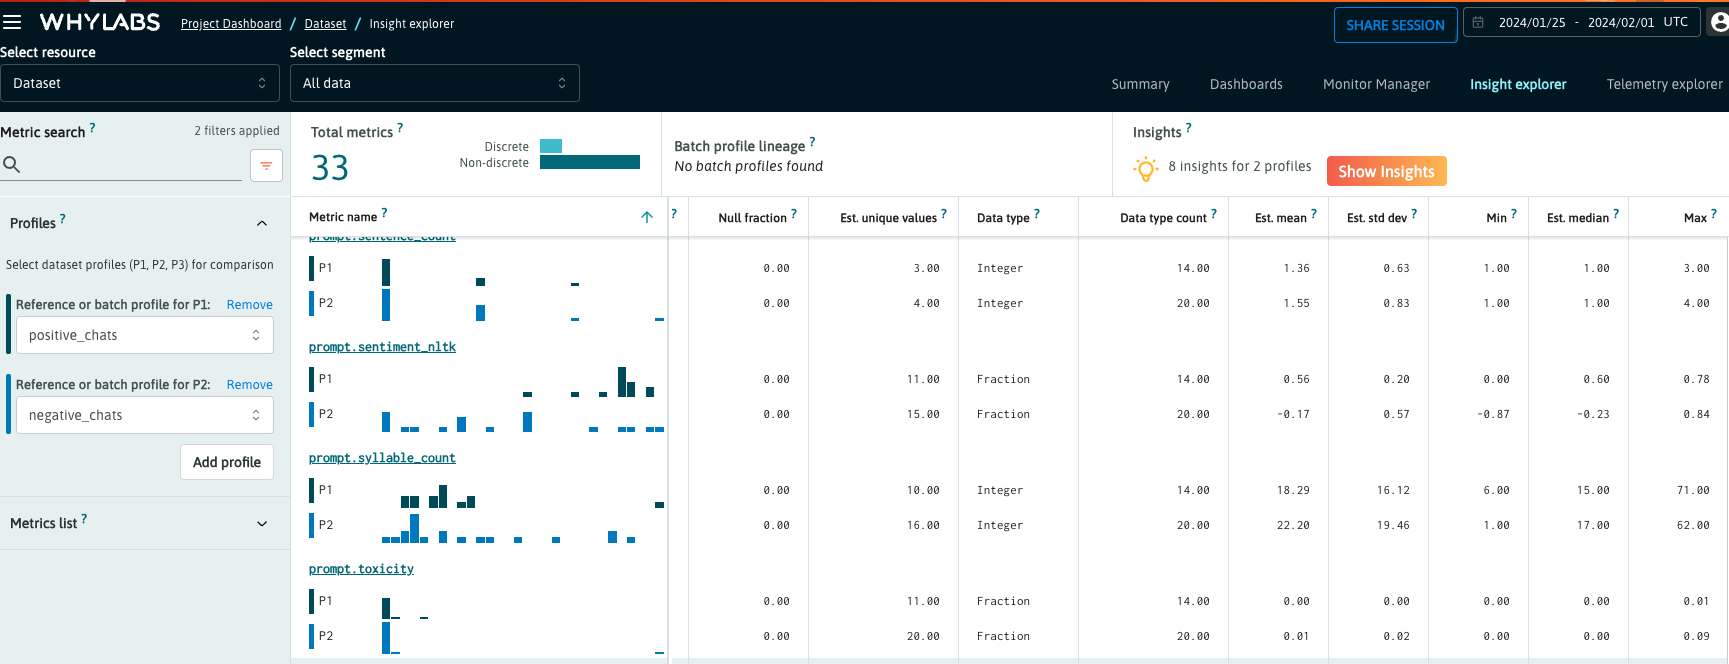

In this example we are using anonymous guest sessions to view the collected metrics in WhyLabs, You can explore and compare specific metrics, in this example we expect a large and obvious distribution drift in the sentiment scores on the response.

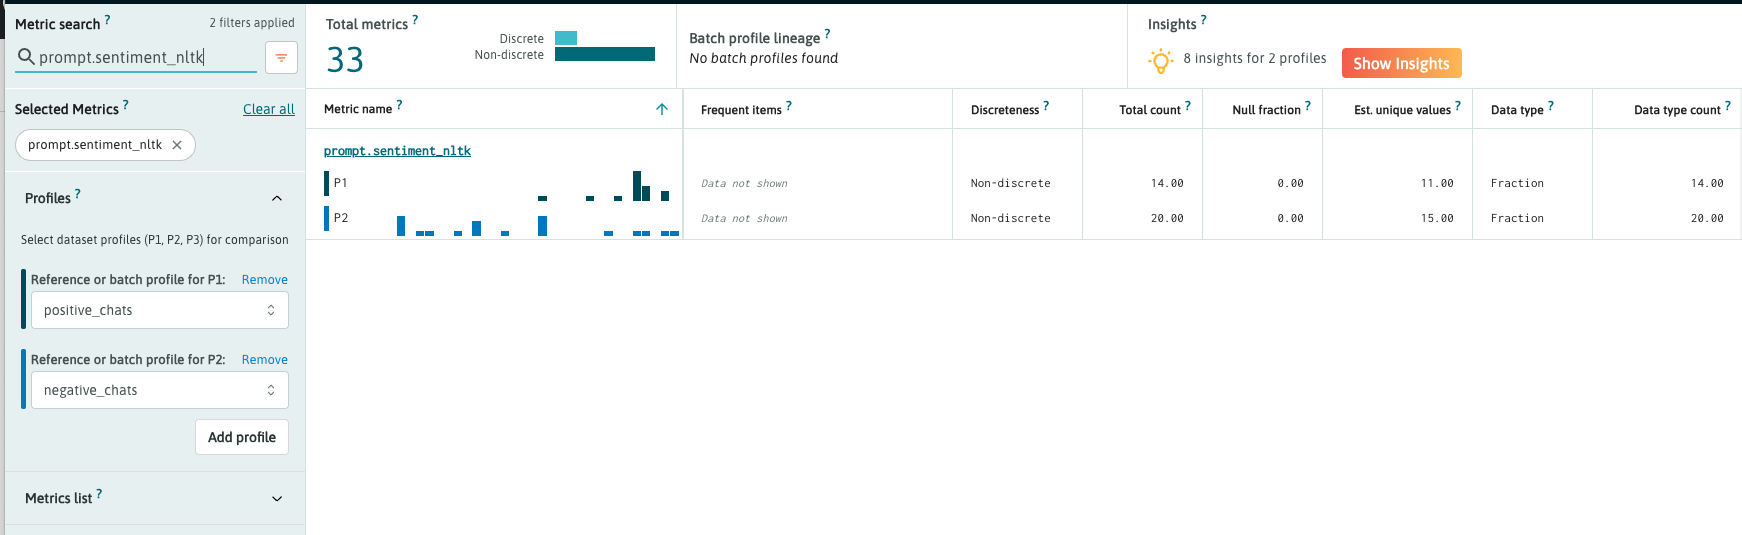

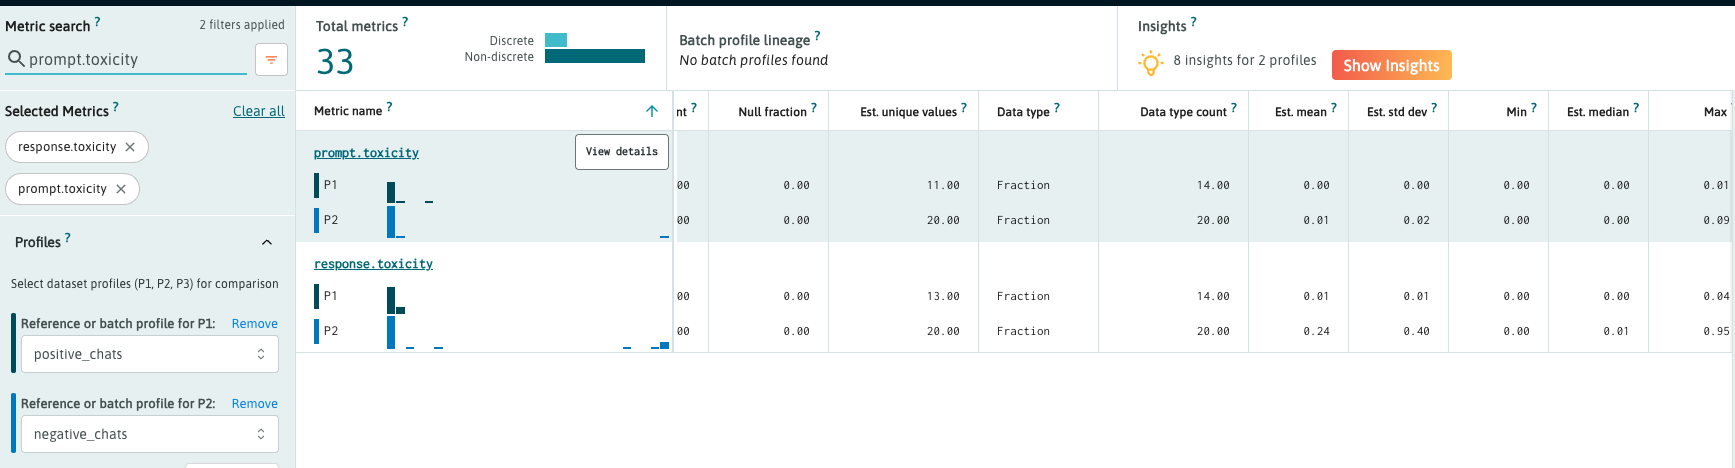

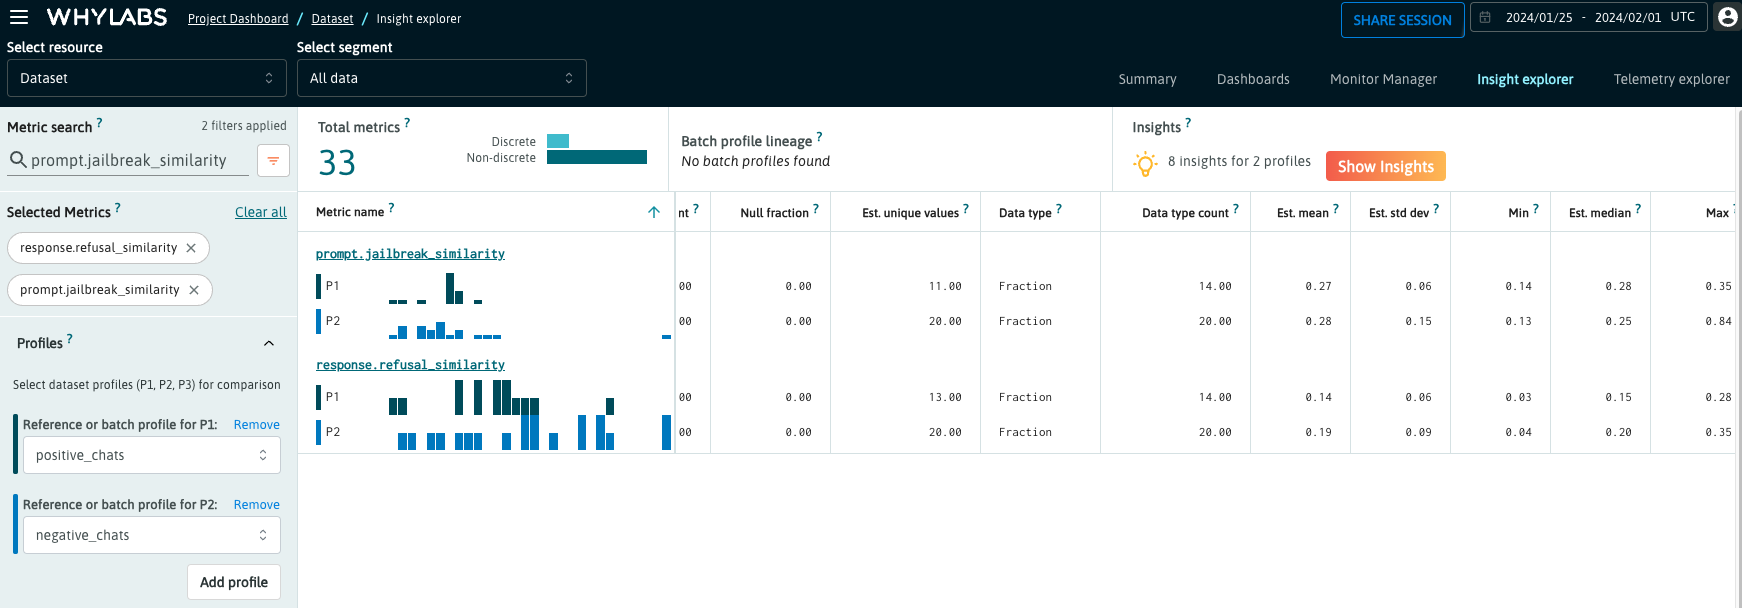

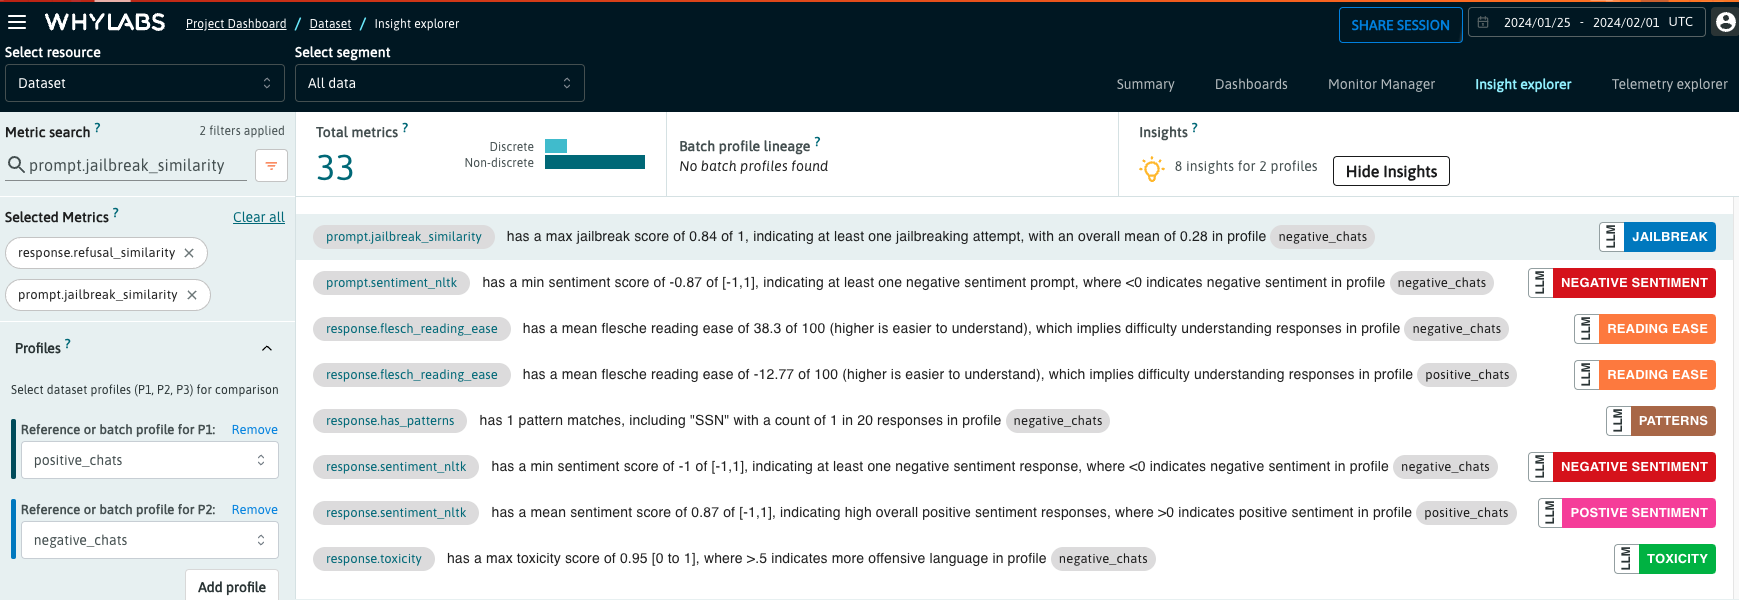

# Monitor Metrics over time
WhyLabs hosts a public demo org where we show a test LLM application being monitored over time. With LangKit telemetry collected over time, you can detect changes systematically and be alerted to potential problems in a deployed LLM application. We think a variety of different metrics can be helpful in detecting anamolies. In this example, something has triggered a series of alerts. Can you guess what went wrong?

Explore a demo environment [here](https://hub.whylabsapp.com/resources/demo-llm-chatbot/columns/prompt.sentiment_nltk?dateRange=2023-06-08-to-2023-06-09&sortModelBy=LatestAlert&sortModelDirection=DESC&targetOrgId=demo&sessionToken=session-8gcsnbVy)!

If you see value in detecting changes in how your LLM application is behaving, you might take a look at some of our other examples showing how to monitor these metrics as a timeseries for an LLM application in production, or how to customize the metrics logged by using your own surrogate models or critic metrics.

* Check out the examples folder for scenarios from ["Hello World!"](https://github.com/whylabs/langkit/blob/main/langkit/examples/Logging_Text.ipynb) to [monitoring](https://github.com/whylabs/langkit/blob/main/langkit/examples/LLM_to_WhyLabs.ipynb) an LLM in production!
* Learn more about the [features](https://github.com/whylabs/langkit#features-%EF%B8%8F) LangKit extracts out of the box.
* Learn more about LangKit's modules [documentation](https://github.com/whylabs/langkit/blob/main/langkit/docs/modules.md).

#Appendix

Some notes to highlight for some metrics:

* **Hallucination:** Requires additional LLM calls to calculate the consistency score. Currently, only OpenAI models are supported through langkit.openai's OpenAILegacy, OpenAIDefault, and OpenAIGPT4, and OpenAIAzure.

* ```prompt.injection``` currently uses the HuggingFace's model [JasperLS/gelectra-base-injection](https://huggingface.co/JasperLS/gelectra-base-injection) to make predictions. There is a note in one web [documention](https://docs.whylabs.ai/docs/langkit-modules/#promptinjection) that I am not sure if it is outdated since it is not in the repo documentation section. "Note: The current model has been known to yield high false positive rates and might not be suited for production use."

* ```esponse.relevance_to_prompt```computes the similarity scores by calculating the cosine similarity between embeddings generated from both prompt and response. The embeddings are generated using the hugginface's model [sentence-transformers/all-MiniLM-L6-v2](https://huggingface.co/sentence-transformers/all-MiniLM-L6-v2).


* The ```regexes``` namespace will search for groups of regexes patterns as defined in the ```pattern_groups.json```. The user can provide its json file to define the regexes patterns to search for. The file should be formatted as the default pattern_groups.json. (***customisable***)

* The ```pii``` namespace will detect entities in prompts/responses such as credit card numbers, phone numbers, SSNs, passport number, etc. It uses [Microsoft's Presidio](https://github.com/microsoft/presidio/) as an engine for PII identification. Requires [Spacy](https://spacy.io/) as a dependency and Spacy's ```en_core_web_lg model```. The list of searched entities is defined in the PII_entities.json under the Langkit folder. Currently, the list of searched entities is: [ "CREDIT_CARD", "CRYPTO", "IBAN_CODE", "IP_ADDRESS", "PHONE_NUMBER", "MEDICAL_LICENSE", "URL", "US_BANK_NUMBER", "US_DRIVER_LICENSE", "US_ITIN", "US_PASSPORT", "US_SSN" ]. The user can provide its json file to define the entities to search for. The file should be formatted as the default ```PII_entities```. (***customisable***)

* **Proactive Injection Detection** is [based on the assumption](https://arxiv.org/abs/2310.12815) that, under a prompt injection attack, the original prompt will not be followed the LLM. This detector will send the to-be-tested user prompt along with an instruction prompt to the LLM. If the LLM does not follow the instruction prompt, it is likely that the user prompt is an injection attack. It requires an additional LLM call to calculate the score. Currently, only OpenAI models are supported through langkit.openai's OpenAILegacy, OpenAIDefault, and OpenAIGPT4, and OpenAIAzure.

* The ```textstat``` namespace will compute various text statistics for each value in every column of type String, using the textstat python package. It will create several udf submetrics related to the text's quality, such as readability, complexity, and grade scores. They are like 23 metrics in this group.

* The ```sentiment``` namespace will compute sentiment scores for each value in every column of type String. It will create a new udf submetric called sentiment_nltk.

* The ```themes``` namespace will compute the similarity score is computed by calculating the cosine similarity between embeddings generated from the target text and set of themes.  For each theme, the returned score is the maximum score found for all the examples in the related set. The embeddings are generated using the hugginface's model [sentence-transformers/all-MiniLM-L6-v2](https://huggingface.co/sentence-transformers/all-MiniLM-L6-v2).The themes are defined in ```themes.json```, and can be customised by the user. It will create a new udf submetric with the name of each theme defined in the json file. (***customisable***)

* The ```topics``` namespace will utilize the [MoritzLaurer/mDeBERTa-v3-base-xnli-multilingual-nli-2mil7](https://huggingface.co/MoritzLaurer/mDeBERTa-v3-base-xnli-multilingual-nli-2mil7) model to classify the input text into one of the defined topics, default topics include: law, finance, medical, education, politics, support. It will create a new udf submetric called closest_topic with the highest scored label.

* The ```toxicity``` namespace will compute toxicity score for each value in the string column. The toxicity score is calculated using [HuggingFace's martin-ha/toxic-comment-model](https://huggingface.co/martin-ha/toxic-comment-model) toxicity analyzer.